---

<h1 style="text-align: center;font-size: 40px;">Dhaka AI: Traffic Detection using YOLOV8</h1>

---

<center><img src="https://img.freepik.com/free-vector/red-traffic-light-flat-illustration_1284-22959.jpg" width="500" height="600"></center>

---

The capital city of Dhaka has only 7% traffic roads (compared to 25% urban standard) in presence of approximately 8 million computers a day with i 306 sq km area. The scenario of Dhaka traffic is unique which poses complex new challenges in terms of automated traffic detection. This new AI-Based Dhaka Traffic Detection Challenge aims at accessing the ability of state-of-the-art methods to detect and recognize traffic vehicle.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

> Dataset:
The dataset is composed of vehicle images, where an image contains a vehicle of one or more of 21 different classes of vehicle. This makes the dataset useful for multiple vehicle detection and recognition. The considered vehicle classes are: ambulance, auto-rickshaw, bicycle, bus, car, garbage van, human hauler, minibus, minivan, motorbike, Pickup, army vehicle, police car, rickshaw, scooter, Suv, taxi, three-wheelers (CNG), truck, van, wheelbarrow.

> Training Custom Dataset:

In [2]:
import torch

print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))  # This will print the name of your GPU

2.3.1+cu121
True
NVIDIA GeForce MX350


In [1]:
hyperparameters = {
    'lr0': 0.01,  # Initial learning rate
    'lrf': 0.2,   # Final learning rate (fraction of initial)
    'momentum': 0.937,
    'weight_decay': 0.0005,
    'warmup_epochs': 3.0,
    'warmup_momentum': 0.8,
    'warmup_bias_lr': 0.1,
    'box': 0.05,  # box loss gain
    'cls': 0.5,   # cls loss gain
    'cls_pw': 1.0,  # cls BCELoss positive_weight
    'obj': 1.0,  # obj loss gain
    'obj_pw': 1.0,  # obj BCELoss positive_weight
    'iou_t': 0.2,  # IoU training threshold
    'anchor_t': 4.0,  # anchor-multiple threshold
    'fl_gamma': 0.0,  # focal loss gamma (efficientDet default gamma=1.5)
    'hsv_h': 0.015,  # image HSV-Hue augmentation (fraction)
    'hsv_s': 0.7,  # image HSV-Saturation augmentation (fraction)
    'hsv_v': 0.4,  # image HSV-Value augmentation (fraction)
    'degrees': 0.0,  # image rotation (+/- deg)
    'translate': 0.1,  # image translation (+/- fraction)
    'scale': 0.5,  # image scale (+/- gain)
    'shear': 0.0,  # image shear (+/- deg)
    'perspective': 0.0,  # image perspective (+/- fraction), range 0-0.001
    'flipud': 0.0,  # image flip up-down (probability)
    'fliplr': 0.5,  # image flip left-right (probability)
    'mixup': 0.0  # image mixup (probability)
}

In [3]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data = "traffic_update.yaml", epochs = 10)

Ultralytics YOLOv8.2.48  Python-3.11.8 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce MX350, 2048MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=traffic_update.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train19, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

train: Scanning D:\OneDrive - northsouth.edu\University\CSE498R\Project\Dhaka-Roads-Traffic-Detection-using-YOLOV8-main\Dhaka-Roads-Traffic-Detection-using-YOLOV8-main\yolov5_formetted_dataset\labels\train.cache... 2390 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2390/2390 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning D:\OneDrive - northsouth.edu\University\CSE498R\Project\Dhaka-Roads-Traffic-Detection-using-YOLOV8-main\Dhaka-Roads-Traffic-Detection-using-YOLOV8-main\yolov5_formetted_dataset\labels\val.cache... 600 images, 0 backgrounds, 0 corrupt: 100%|██████████| 600/600 [00:00<?, ?it/s]


Plotting labels to runs\detect\train19\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train19
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.77G      1.438      3.509       1.23         37        640: 100%|██████████| 150/150 [22:45<00:00,  9.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [02:13<00:00,  7.03s/it]


                   all        600       5090      0.584      0.124     0.0955     0.0574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.81G      1.404      2.407      1.228         29        640: 100%|██████████| 150/150 [29:50<00:00, 11.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [03:07<00:00,  9.88s/it]


                   all        600       5090      0.627      0.154      0.132     0.0807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.77G       1.37      2.167       1.21         82        640: 100%|██████████| 150/150 [25:53<00:00, 10.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [02:39<00:00,  8.40s/it]


                   all        600       5090      0.558      0.168      0.153     0.0922

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.79G      1.335      2.004      1.193         40        640: 100%|██████████| 150/150 [39:31<00:00, 15.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [02:59<00:00,  9.47s/it]


                   all        600       5090      0.635      0.195       0.18      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.09G      1.293      1.879      1.169         20        640: 100%|██████████| 150/150 [27:48<00:00, 11.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [03:06<00:00,  9.80s/it]


                   all        600       5090       0.67      0.206      0.201      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.03G      1.278       1.77      1.157         83        640: 100%|██████████| 150/150 [38:53<00:00, 15.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [02:55<00:00,  9.25s/it]


                   all        600       5090      0.614      0.237      0.221      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.02G      1.251      1.695      1.144         71        640: 100%|██████████| 150/150 [43:39<00:00, 17.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [02:44<00:00,  8.65s/it]


                   all        600       5090      0.626      0.239      0.235      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.59G      1.232      1.622      1.133         38        640: 100%|██████████| 150/150 [27:12<00:00, 10.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [02:09<00:00,  6.82s/it]


                   all        600       5090       0.68      0.242      0.256      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       2.9G      1.206      1.556      1.112         39        640: 100%|██████████| 150/150 [29:19<00:00, 11.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  11%|█         | 2/19 [00:15<02:20,  8.29s/it]

WARNING  NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [02:10<00:00,  6.89s/it]


                   all        600       5090       0.65      0.253      0.259      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.18G      1.184      1.507      1.108        110        640: 100%|██████████| 150/150 [49:21<00:00, 19.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [02:44<00:00,  8.68s/it]


                   all        600       5090      0.672      0.254       0.27      0.178

10 epochs completed in 6.087 hours.
Optimizer stripped from runs\detect\train19\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train19\weights\best.pt, 6.3MB

Validating runs\detect\train19\weights\best.pt...
Ultralytics YOLOv8.2.48  Python-3.11.8 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce MX350, 2048MiB)
Model summary (fused): 168 layers, 3009743 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [01:07<00:00,  3.57s/it]


                   all        600       5090      0.673      0.254      0.271      0.178
             ambulance         22         22          1          0     0.0154     0.0082
         auto rickshaw         29         70      0.637        0.2      0.299      0.218
               bicycle         71         97      0.496      0.165      0.207      0.107
                   bus        300        698      0.573      0.662      0.669      0.457
                   car        321       1097      0.594      0.713      0.674      0.451
            garbagevan          1          1          1          0          0          0
          human hauler         30         40          1          0     0.0797     0.0545
               minibus         11         18          1          0     0.0206     0.0132
               minivan        103        158      0.234      0.278      0.182      0.124
             motorbike        237        466      0.531      0.538      0.523      0.268
                Picku

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000195CC908290>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042, 

In [4]:
!yolo task='detect' mode='val' model= "D:\OneDrive - northsouth.edu\University\CSE498R\Project\Dhaka-Roads-Traffic-Detection-using-YOLOV8-main\Dhaka-Roads-Traffic-Detection-using-YOLOV8-main\runs\detect\train19\weights\best.pt" data = "traffic_update.yaml"

Ultralytics YOLOv8.2.48 🚀 Python-3.11.8 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce MX350, 2048MiB)
Model summary (fused): 168 layers, 3009743 parameters, 0 gradients, 8.1 GFLOPs
                   all        600       5090      0.673      0.255      0.271      0.179
             ambulance         22         22          1          0     0.0154    0.00822
         auto rickshaw         29         70      0.624        0.2      0.298      0.218
               bicycle         71         97      0.496      0.165      0.207      0.108
                   bus        300        698      0.575      0.662       0.67      0.457
                   car        321       1097      0.596      0.714      0.675      0.452
            garbagevan          1          1          1          0          0          0
          human hauler         30         40          1          0     0.0791     0.0539
               minibus         11         18          1          0     0.0206     0.0134
               minivan 


val: Scanning D:\OneDrive - northsouth.edu\University\CSE498R\Project\Dhaka-Roads-Traffic-Detection-using-YOLOV8-main\Dhaka-Roads-Traffic-Detection-using-YOLOV8-main\yolov5_formetted_dataset\labels\val.cache... 600 images, 0 backgrounds, 0 corrupt: 100%|██████████| 600/600 [00:00<?, ?it/s]
val: Scanning D:\OneDrive - northsouth.edu\University\CSE498R\Project\Dhaka-Roads-Traffic-Detection-using-YOLOV8-main\Dhaka-Roads-Traffic-Detection-using-YOLOV8-main\yolov5_formetted_dataset\labels\val.cache... 600 images, 0 backgrounds, 0 corrupt: 100%|██████████| 600/600 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 1/38 [00:06<04:04,  6.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▌         | 2/38 [00:10<02:57,  4.93s/it]
             

In [6]:
import os
os.listdir("runs/detect/val3")

['confusion_matrix.png',
 'confusion_matrix_normalized.png',
 'F1_curve.png',
 'PR_curve.png',
 'P_curve.png',
 'R_curve.png',
 'val_batch0_labels.jpg',
 'val_batch0_pred.jpg',
 'val_batch1_labels.jpg',
 'val_batch1_pred.jpg',
 'val_batch2_labels.jpg',
 'val_batch2_pred.jpg']

>Validation Result:

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,9))
img = plt.imread("runs/detect/val3/val_batch1_pred.jpg")
plt.imshow(img)
plt.show()

<Figure size 1000x900 with 1 Axes>

In [12]:
plt.figure(figsize=(12,9))
img = ['F1_curve.png', 'PR_curve.png']
for i,image in enumerate(img):
    plt.subplot(1,2,i+1)
    res = plt.imread(f"runs/detect/val3/{image}")
    plt.imshow(res)

> Confusion Matrix:

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,9))
img = plt.imread("runs/detect/val3/confusion_matrix.png")
plt.imshow(img)
plt.show()

<Figure size 1200x900 with 2 Axes>

<Figure size 1000x900 with 1 Axes>

> Testing:

In [10]:
!yolo task='detect' mode='predict' model= "D:\OneDrive - northsouth.edu\University\CSE498R\Project\Dhaka-Roads-Traffic-Detection-using-YOLOV8-main\Dhaka-Roads-Traffic-Detection-using-YOLOV8-main\runs\detect\train19\weights\best.pt", save=True source = "D:\OneDrive - northsouth.edu\University\CSE498R\Project\Dhaka-Roads-Traffic-Detection-using-YOLOV8-main\Dhaka-Roads-Traffic-Detection-using-YOLOV8-main\Test"

WARNING ⚠️ argument 'model=D:\OneDrive - northsouth.edu\University\CSE498R\Project\Dhaka-Roads-Traffic-Detection-using-YOLOV8-main\Dhaka-Roads-Traffic-Detection-using-YOLOV8-main\runs\detect\train19\weights\best.pt,' does not require trailing comma ',', updating to 'model=D:\OneDrive - northsouth.edu\University\CSE498R\Project\Dhaka-Roads-Traffic-Detection-using-YOLOV8-main\Dhaka-Roads-Traffic-Detection-using-YOLOV8-main\runs\detect\train19\weights\best.pt'.

image 1/24 D:\OneDrive - northsouth.edu\University\CSE498R\Project\Dhaka-Roads-Traffic-Detection-using-YOLOV8-main\Dhaka-Roads-Traffic-Detection-using-YOLOV8-main\Test\Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494c2.jpg: 640x640 1  bus, 4 cars, 4 motorbikes, 1 Pickup, 17.0ms
image 2/24 D:\OneDrive - northsouth.edu\University\CSE498R\Project\Dhaka-Roads-Traffic-Detection-using-YOLOV8-main\Dhaka-Roads-Traffic-Detection-using-YOLOV8-main\Test\Sabiha_(38)_jpg.rf.0938b234884f5978919bd69e2aa4cb10.jpg: 640x640 2  buss, 7 cars, 4 motorbi

In [13]:
os.listdir("runs/detect/predict2")

['Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494c2.jpg',
 'sabiha(126)_jpg.rf.87d3da6707cc9e5c26ef0a596f105d7e.jpg',
 'sabiha(137)_jpg.rf.1fe289fa9fad11b64e23ed915273b443.jpg',
 'sabiha(181)_jpg.rf.b99d43b03ae4de0802be741ec4bd9740.jpg',
 'sabiha(290)_jpg.rf.610ba4043e25a173509f60d3f89f9a08.jpg',
 'sabiha(292)_jpg.rf.1918842e4b4e3f3fa3094e3abf5c42a9.jpg',
 'Sabiha_(38)_jpg.rf.0938b234884f5978919bd69e2aa4cb10.jpg',
 'Sabiha_(42)_jpg.rf.8c93439403401779f6ee5f2e0be77134.jpg',
 'Shykat_02_008_jpg.rf.759be3002772eba98dce6c3056eee12e.jpg',
 'Shykat_02_024_jpg.rf.b475e9a7706ce7be83108e15364f8ffd.jpg',
 'Shykat_02_034_jpg.rf.1fa05bb88511519df963de974436b0b9.jpg',
 'Shykat_02_044_jpg.rf.c4a654cef9a50e97c37689ffca72e496.jpg',
 'Shykat_02_051_jpg.rf.eb5dd25e6ca1768e793952d89c7d2298.jpg',
 'Shykat_03_007_jpg.rf.5199efb620d9bc989494ba058d813271.jpg',
 'Shykat_03_023_jpg.rf.a443eee6c1a35f2a07d69c8e5f79125c.jpg',
 'Shykat_4_ (10)_jpg.rf.029f4c991081a75e9714ce551a622e6f.jpg',
 'Shykat_4_ (34)_jpg.rf.1b

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
img = plt.imread("runs/detect/predict2/Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494c2.jpg")
plt.imshow(img)
plt.show()

<Figure size 1200x900 with 1 Axes>

<Figure size 1200x900 with 2 Axes>

<Figure size 800x700 with 1 Axes>

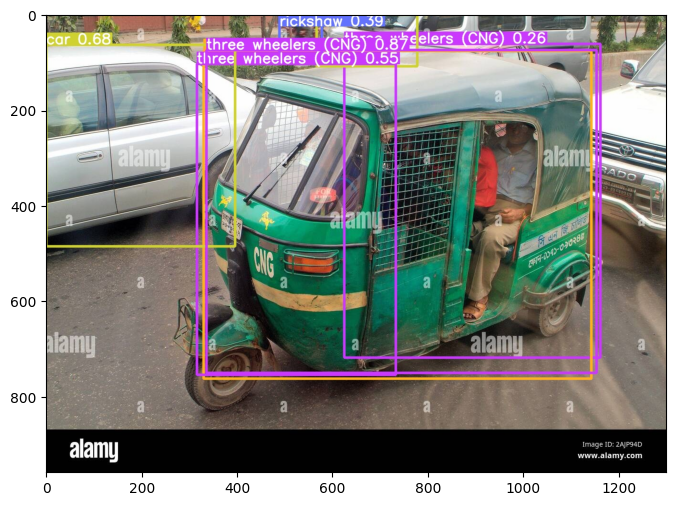

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
img = plt.imread("runs/detect/predict/test_img3.jpg")
plt.imshow(img)
plt.show()

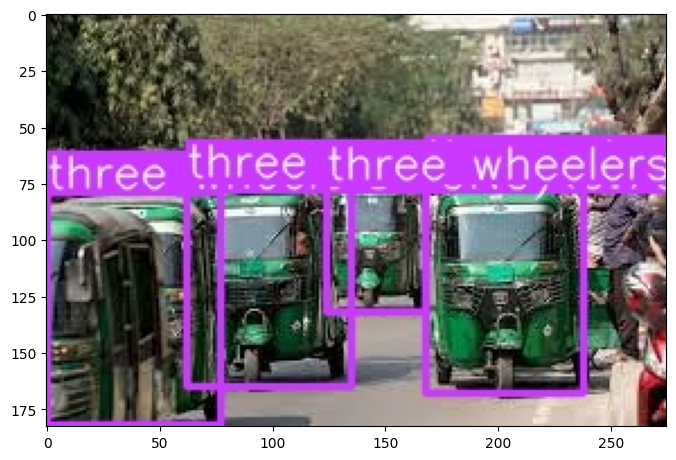

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
img = plt.imread("runs/detect/predict/test_img4.jpeg")
plt.imshow(img)
plt.show()

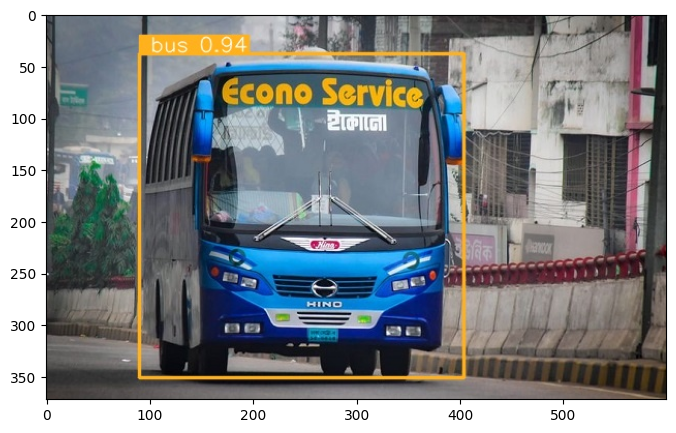

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
img = plt.imread("runs/detect/predict/test_img6.jpg")
plt.imshow(img)
plt.show()

In [43]:
!yolo 'detect' 'predict' model= "runs/detect/train/weights/best.pt" source = "input/test-images-for-dhaka-ai/test_img7.jpg"

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.106 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 3009743 parameters, 0 gradients

image 1/1 /kaggle/input/test-images-for-dhaka-ai/test_img7.jpg: 640x640 2  buss, 2 cars, 1 minivan, 2 motorbikes, 3 three wheelers (CNG)s, 1 van, 9.5ms
Speed: 6.4ms preprocess, 9.5ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


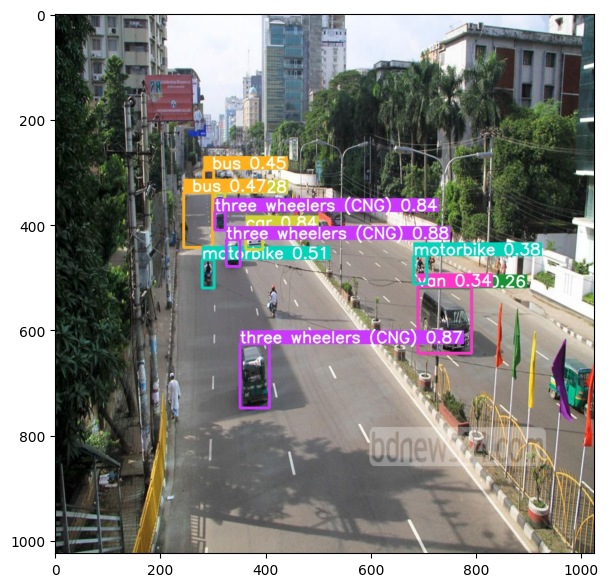

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
img = plt.imread("runs/detect/predict2/test_img7.jpg")
plt.imshow(img)
plt.show()

In [48]:
!yolo 'detect' 'predict' model= "runs/detect/train/weights/best.pt" source = "input/test-images-for-dhaka-ai/test_img8.jpg"

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.106 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 3009743 parameters, 0 gradients

image 1/1 /kaggle/input/test-images-for-dhaka-ai/test_img8.jpg: 640x640 2 auto rickshaws, 1 motorbike, 1 rickshaw, 10.6ms
Speed: 6.1ms preprocess, 10.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


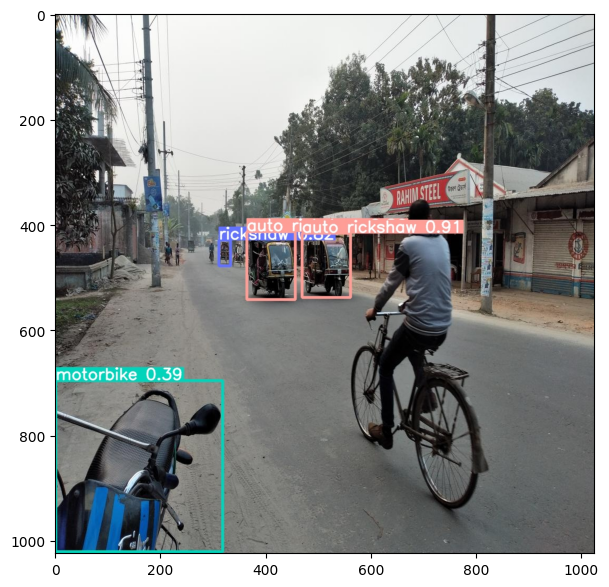

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
img = plt.imread("runs/detect/predict3/test_img8.jpg")
plt.imshow(img)
plt.show()